# import useful libraries

In [3]:
import pandas as pd
import jieba
import numpy as np
from PIL import Image
import jieba
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import pyecharts
import seaborn as sns
from pyecharts.charts import Map
from pyecharts import options as opts
%matplotlib inline
sns.set_style('darkgrid', {'font.family':'simhei'})

In [4]:
df1 = pd.read_csv("C:/Users/melvi/Desktop/Capstone/final_1_1.csv", encoding = "gbk")

# plot showing the unit price distribution

In [41]:
df1 = df.copy()

In [44]:
grouped_df1 = df1.groupby(['District'])
grouped_df1.mean()[['Unit Price']].sort_values(by='Unit Price', ascending=False)

,Unit Price
District,
黄浦,95785.299673
徐汇,75888.405259
静安,75816.469429
长宁,71286.299231
虹口,67117.043144
杨浦,62876.702819
普陀,58038.716776
浦东,55653.841107
闵行,48993.515654


Text(0,0.5,'Unit Price(RMB/M2)')

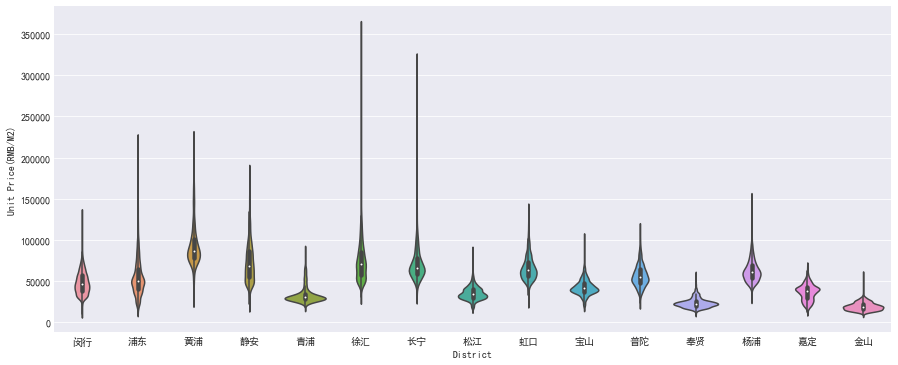

In [27]:
plt.figure(figsize=(15, 6))
g = sns.violinplot(data = df1, x='District', y='Unit Price')
plt.xlabel('District')
plt.ylabel('Unit Price(RMB/M2)')

Text(0,0.5,'Unit Price(RMB/M2)')

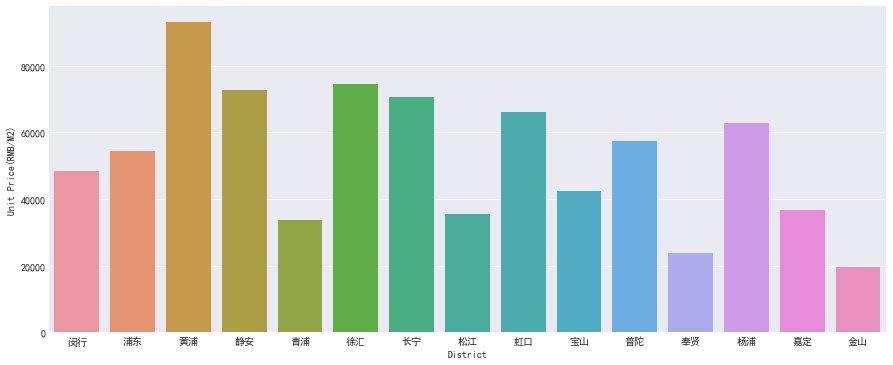

In [28]:
plt.figure(figsize=(15, 6))
g = sns.barplot(data = df1, x='District', y='Unit Price' ,ci=None)
plt.xlabel('District')
plt.ylabel('Unit Price(RMB/M2)')

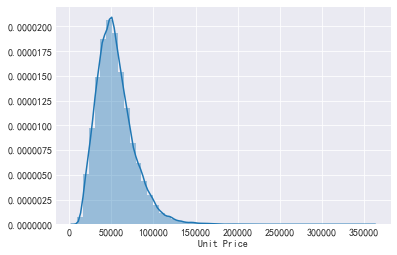

In [29]:
g=sns.distplot(df2['Unit Price'])

# interactive map

In [33]:
df2 = df1.copy()
df2['District'] = df1['District'].map(lambda x: x+'区')
grouped_df2 = df2.groupby(['District'])
df2 = grouped_df2.mean()
print(df2)
df2 = df2.rename(index={'浦东区':'浦东新区'})
def map_beijing()-> Map:
    c = Map()
    c.add('每平米房价', [list(z) for z in zip(df2.index.values, df2['Unit Price'])], "上海")
    c.set_global_opts( title_opts=opts.TitleOpts(title="上海房价地图"), 
                      visualmap_opts=opts.VisualMapOpts(max_=100000))
    c.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    return c

map = map_beijing()
map.render_notebook()

          Maintenance Cost  Total Building  Total House        Area  \
District                                                              
嘉定区               1.719654       72.356421  1655.914502   86.885844   
奉贤区               1.033388      147.822626  2013.386583   97.135270   
宝山区               1.349102      134.892596  1938.507998   86.254276   
徐汇区               3.830800       50.289437  1178.622066   80.188754   
普陀区               2.046622       61.242100  1837.691851   76.033599   
杨浦区               1.147075       61.739031  1532.465037   70.638633   
松江区               1.725990      122.061257  1796.576702  106.876856   
浦东区               1.432613       74.673873  1302.721993   91.406197   
虹口区               1.389214       40.550731  1155.809872   80.572852   
金山区               0.967326       95.279161  1375.340760   88.623460   
长宁区               1.840906       32.247877   777.528154   87.416562   
闵行区               1.424992       89.700471  1593.549752   96.616524   
青浦区   

# unit orice vs area &unit price vs distance to the center

In [3]:
df2 = pd.read_csv("C:/Users/melvi/Desktop/Capstone/final_2_300.csv", encoding = "gbk")

(0, 200000)

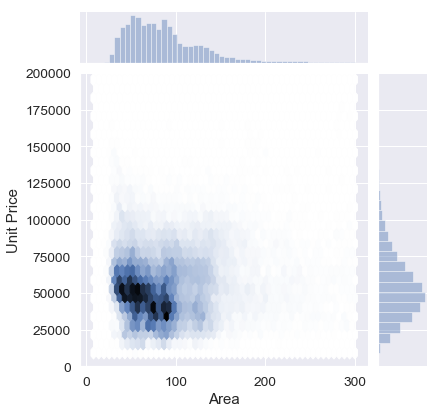

In [85]:
sns.jointplot(x='Area',y='Unit Price',data=df2,kind = "hex")
plt.ylim(0, 200000)

(0, 200000)

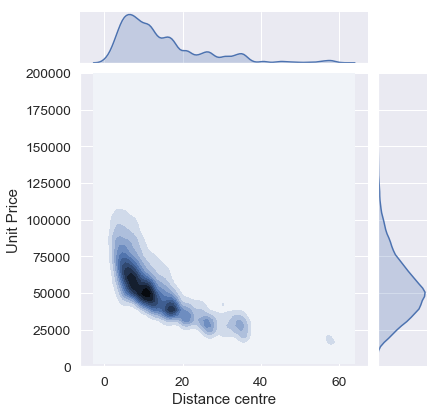

In [84]:
sns.jointplot(x='Distance centre',y='Unit Price',data=df2,kind = "kde")
plt.ylim(0, 200000)

# correlation b/w distance to centre and to the nearest top shopping mall

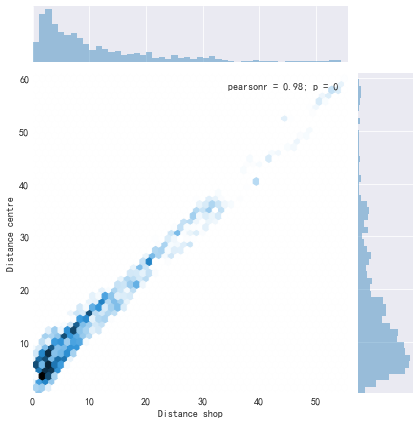

In [60]:
sns.jointplot(x='Distance shop',y='Distance centre',data=df2,kind = "hex")

# Unit price vs year

In [19]:
df3 = df2.groupby("Year")["Unit Price"].mean()
df3 = pd.DataFrame(df3)
df3.reset_index(inplace = True)

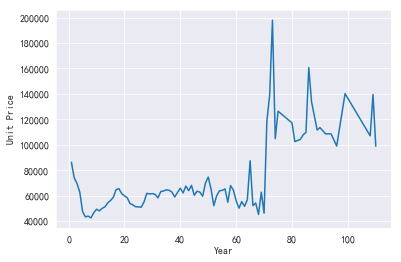

In [20]:
sns.lineplot(x="Year",
             y="Unit Price",
             ci=None,
             data=df3)

# correlation heatmap

In [64]:
data = pd.read_csv("C:/Users/melvi/Desktop/Capstone/merge3_1.csv", encoding = "gbk")

Populating the interactive namespace from numpy and matplotlib


C:\Users\melvi\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


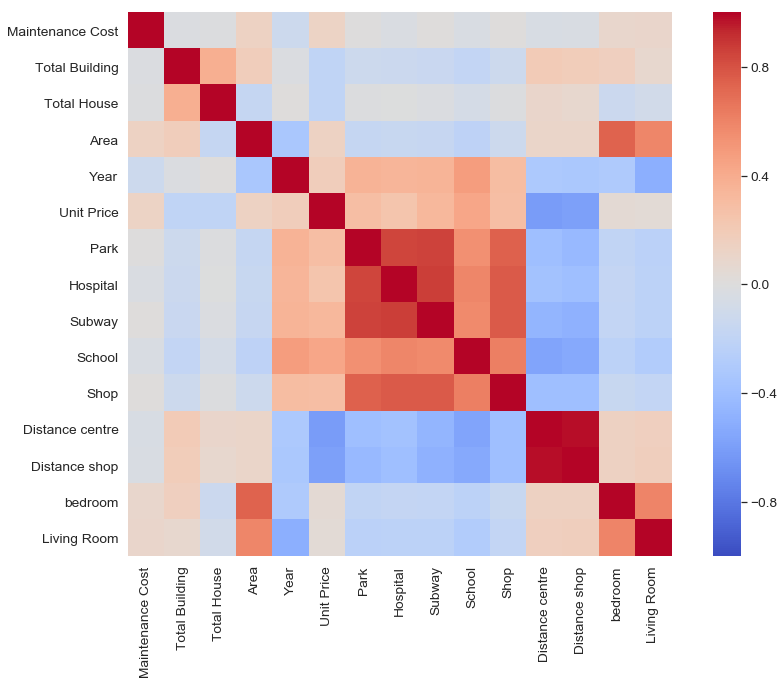

In [65]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)
corrmatrix = data.corr()
sns.heatmap(corrmatrix,square=True,vmax=1,vmin=-1,center=0.0,cmap='coolwarm')

# top 5 most correlated data

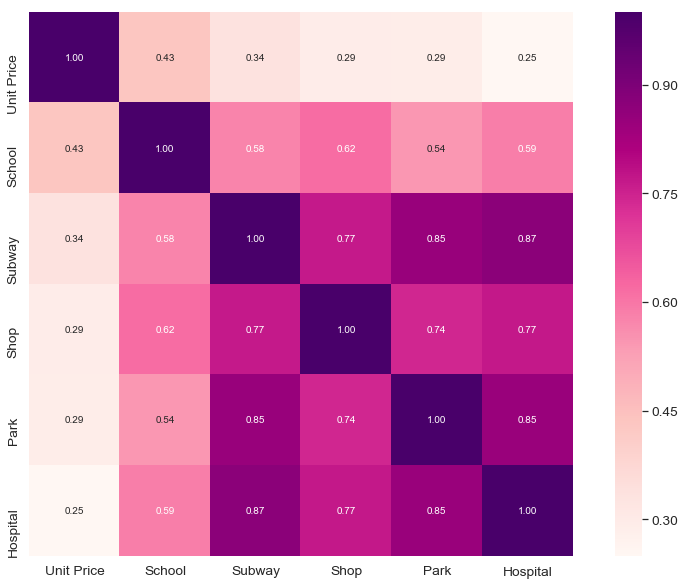

In [68]:
k=6

cols = corrmatrix.nlargest(k,'Unit Price')['Unit Price'].index
cm = np.corrcoef(data[cols].values.T)

sns.set(font_scale=1.25)

hm = sns.heatmap(cm,cmap='RdPu',annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)



# Bonus: Wordcloud

In [ ]:
back_color =  np.array(Image.open("C:/Users/melvi/Desktop/Capstone/wordcloud/shanghai_black.jpg"))  

wc = WordCloud(background_color='white', 
               max_words=150,  
               mask=back_color,  
               max_font_size=40,  
               stopwords=STOPWORDS.add('金卫'),  
               font_path="C:/Windows/Fonts/STFANGSO.ttf", 
               random_state=42,  
               width=2000,  
               height=1600,  
               scale = 4
               )

jieba.load_userdict("C:/Users/melvi/Desktop/Capstone/wordcloud/dict.txt")

text = jieba.cut(str(df1["Title"]))
text =str('/'.join(text))


wc.generate(text)
image_colors = ImageColorGenerator(back_color)

plt.imshow(wc)

plt.axis('off')
plt.figure()
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis('off')